# D26C - Decision Tree

In [3]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [4]:
#Options
pd.set_option('display.max_columns', 500, 'display.width', 1000)

In [18]:
#values represented by 2 coordinates x, y
m = ['Mandakini', 23, 150, 'F', 'Yes']  # age, salary in 1000, gender, left or not
c = ['Catherine', 21, 154, 'F', 'No']
a = ['Akshay', 25, 160, 'M', 'Yes']
k = ['Amit', 24, 170, 'M', 'Yes']
rownames = ['m','c','a','k']
colnames = ['name', 'age','salary', 'gender', 'attrition']
#form 2 groups by closeness
print(m, c, a, k)

['Mandakini', 23, 150, 'F', 'Yes'] ['Catherine', 21, 154, 'F', 'No'] ['Akshay', 25, 160, 'M', 'Yes'] ['Amit', 24, 170, 'M', 'Yes']


In [19]:
data = [m,c,a, k]
df = pd.DataFrame(data, columns=colnames, index=rownames)
df

,name,age,salary,gender,attrition
m,Mandakini,23,150,F,Yes
c,Catherine,21,154,F,No
a,Akshay,25,160,M,Yes
k,Amit,24,170,M,Yes


In [20]:
from sklearn.preprocessing import LabelEncoder
#ordEncoder = OrdinalEncoder()
label_encoder = LabelEncoder()

In [21]:
cat_cols =['gender','attrition']
print(df[cat_cols].head())

  gender attrition
m      F       Yes
c      F        No
a      M       Yes
k      M       Yes


In [23]:
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
df

,name,age,salary,gender,attrition
m,Mandakini,23,150,0,1
c,Catherine,21,154,0,0
a,Akshay,25,160,1,1
k,Amit,24,170,1,1


-  Gender : F-0, M-1 ; 
-  Attition : Yes-1, No-0

In [24]:
df

,name,age,salary,gender,attrition
m,Mandakini,23,150,0,1
c,Catherine,21,154,0,0
a,Akshay,25,160,1,1
k,Amit,24,170,1,1


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
X = df.drop(columns =['name','attrition'])
y = df.attrition
print(X, '\n', y)

   age  salary  gender
m   23     150       0
c   21     154       0
a   25     160       1
k   24     170       1 
 m    1
c    0
a    1
k    1
Name: attrition, dtype: int32


In [28]:
clsModel = DecisionTreeClassifier(max_depth=3,random_state=123).fit(X, y)  #model with parameter
clsModel.classes_

array([0, 1])

In [29]:
y_pred = clsModel.predict(X)
y_pred

array([1, 0, 1, 1])

In [30]:
pd.concat([y.reset_index(drop=True), pd.Series(y_pred, name='Predicted').reset_index(drop=True)], axis=1)

,attrition,Predicted
0,1,1
1,0,0
2,1,1
3,1,1


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
clsReport = classification_report(y_true=np.array(y), y_pred= y_pred)
print('Classification Report ', clsReport)

Classification Report                precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [34]:
cm = confusion_matrix(y_true=y, y_pred=y_pred)
print('Confusion Matrix ', cm)

Confusion Matrix  [[1 0]
 [0 3]]


In [37]:
accScore = accuracy_score(y_true=y, y_pred=y_pred)
print('Accuracy Score ', accScore) #1.0 100%

Accuracy Score  1.0


In [39]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 22.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

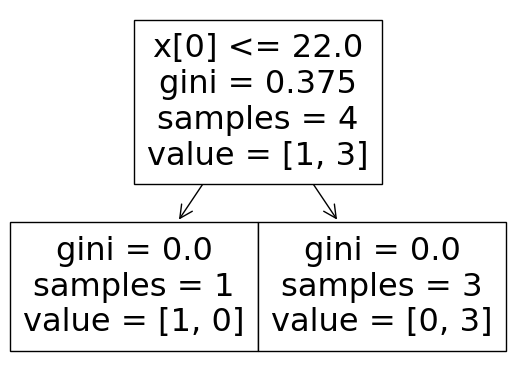

In [40]:
plot_tree(decision_tree=clsModel)

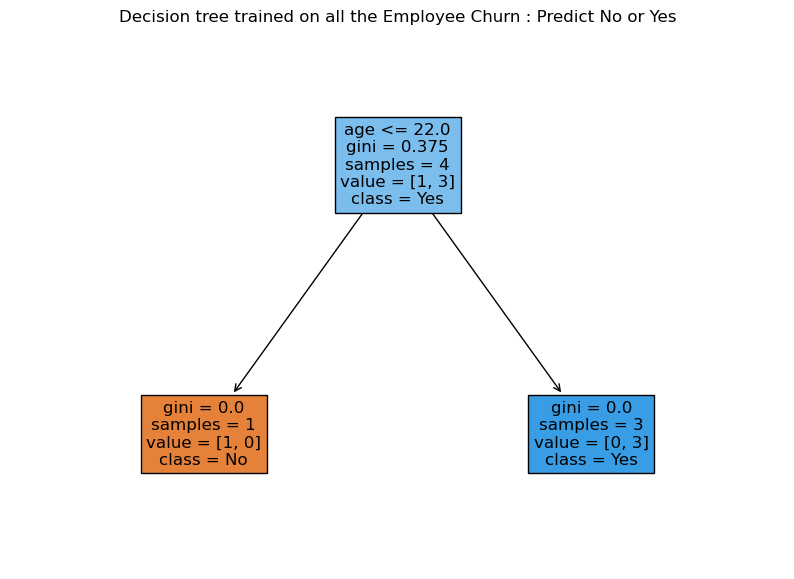

In [42]:
plt.figure(figsize=(10,7))
plot_tree(clsModel, filled=True, feature_names=['age', 'salary', 'gender'], class_names=['No','Yes'], fontsize=12, max_depth=3)
plt.title("Decision tree trained on all the Employee Churn : Predict No or Yes")
plt.show();

In [57]:
newData1 = pd.DataFrame({'age':[24, 25], 'salary':[100, 200], 'gender':[0,1]})
newData1

,age,salary,gender
0,24,100,0
1,25,200,1


In [58]:
clsModel.predict(newData1)
#predict Salary of these persons(they will leave)

array([1, 1])

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
df

,name,age,salary,gender,attrition
m,Mandakini,23,150,0,1
c,Catherine,21,154,0,0
a,Akshay,25,160,1,1
k,Amit,24,170,1,1


In [48]:
X1 = df.drop(columns =['name', 'salary'])
y1 = df.salary
print(X1, '\n', y)

   age  gender  attrition
m   23       0          1
c   21       0          0
a   25       1          1
k   24       1          1 
 m    1
c    0
a    1
k    1
Name: attrition, dtype: int32


In [49]:
regDT = DecisionTreeRegressor(max_depth=5).fit(X1, y1)
regDT

DecisionTreeRegressor(max_depth=5)

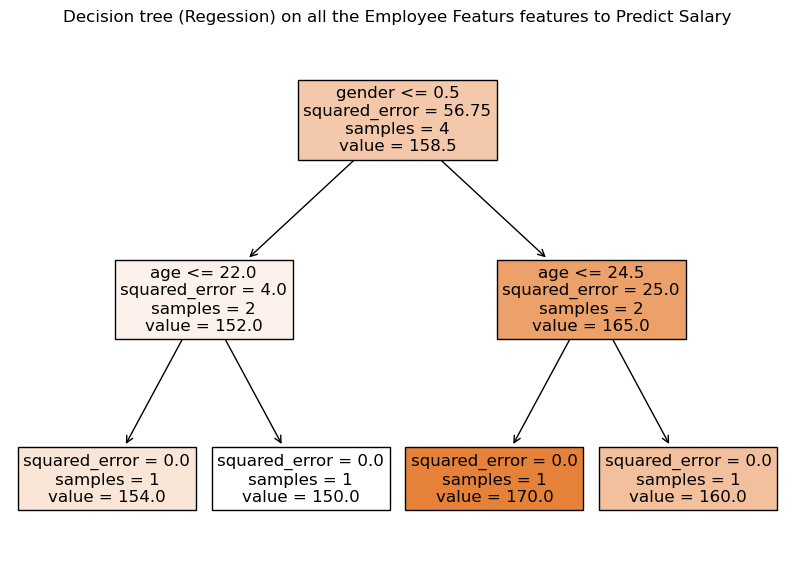

In [51]:
plt.figure(figsize=(10,7))
plot_tree(regDT, filled=True, feature_names=['age', 'gender', 'attrition'], fontsize=12, max_depth=2)
plt.title("Decision tree (Regession) on all the Employee Featurs features to Predict Salary")
plt.show();
#keep changing value of max_dept to see the effect on tree

In [54]:
newData2 = pd.DataFrame({'age':[24, 25], 'gender':[0,1], 'attrition':[0,0]})
newData2

,age,gender,attrition
0,24,0,0
1,25,1,0


In [55]:
regDT.predict(newData2)
#predict Salary of these persons

array([150., 160.])

# End here
-   use large data
-   encode
-   train, test, validation
-   random forests